In [4]:
library(Seurat)
library(dplyr)
library(magrittr)
IRdisplay::display_html("<style> .container { width:95% !important; } </style>")
library("xlsx")
#library(mgsa)
library("ggplot2")# note that Seurat v3, they return ggplot object for easy customization
library(parallel)

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [16]:
Hiplex.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Yoshiko/Hiplex/3D/0.07/Wothreshold/Hiplex_Seurat Object_before process.rds")

In [765]:
Hiplex.integrated<-NormalizeData(object =Hiplex.integrated,verbose = FALSE) 

In [766]:
Hiplex.integrated<- FindVariableFeatures(object =Hiplex.integrated,selection.method = "vst", nfeatures = 12, verbose = FALSE)

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.35261”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.37854”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.60869”

In [767]:
Hiplex.integrated<- ScaleData(object = Hiplex.integrated, features = rownames(x =Hiplex.integrated))

Centering and scaling data matrix


Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”Warning message in irlba(A = t(x = object), nv = npcs, ...):
“did not converge--results might be invalid!; try increasing work or maxit”Warning message in JackStraw(object = Hiplex.integrated, num.replicate = 100):
“Number of dimensions specified is greater than those available. Setting dims to 11 and continuing”Warning message in JackStraw(object = Hiplex.integrated, num.replicate = 100):
“Number of variable genes given 0.01 as the prop.freq is low. Consider including more variable genes and/or increasing prop.freq. Continuing with 3 genes in every random sampling.”Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”Warning message in irlba(A = t(x = object), nv = npcs, ...):
“did not converge--results might be invalid!; try incr

“did not converge--results might be invalid!; try increasing work or maxit”Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”Warning message in irlba(A = t(x = object), nv = npcs, ...):
“did not converge--results might be invalid!; try increasing work or maxit”Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”Warning message in irlba(A = t(x = object), nv = npcs, ...):
“did not converge--results might be invalid!; try increasing work or maxit”Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”Warning message in irlba(A = t(x = object), nv = npcs, ...):
“did not converge--results might be invalid!; try increasing work or maxit”Warning message in irlba(A = t(x = object), nv = 

“did not converge--results might be invalid!; try increasing work or maxit”Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”Warning message in irlba(A = t(x = object), nv = npcs, ...):
“did not converge--results might be invalid!; try increasing work or maxit”Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”Warning message in irlba(A = t(x = object), nv = npcs, ...):
“did not converge--results might be invalid!; try increasing work or maxit”Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”Warning message in irlba(A = t(x = object), nv = npcs, ...):
“did not converge--results might be invalid!; try increasing work or maxit”Warning message in irlba(A = t(x = object), nv = 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 22432
Number of edges: 676606

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9787
Number of communities: 6
Elapsed time: 2 seconds


01:53:34 Read 22432 rows and found 10 numeric columns
01:53:34 Using Annoy for neighbor search, n_neighbors = 30
01:53:34 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
01:53:36 Writing NN index file to temp file /tmp/Rtmp3azU90/file5c7e192eb6f7
01:53:36 Searching Annoy index using 1 thread, search_k = 3000
01:53:43 Annoy recall = 100%
01:53:43 Commencing smooth kNN distance calibration using 1 thread
01:53:44 102 smooth knn distance failures
01:53:44 Initializing from normalized Laplacian + noise
01:53:45 Commencing optimization for 200 epochs, with 870266 positive edges
01:54:01 Optimization finished


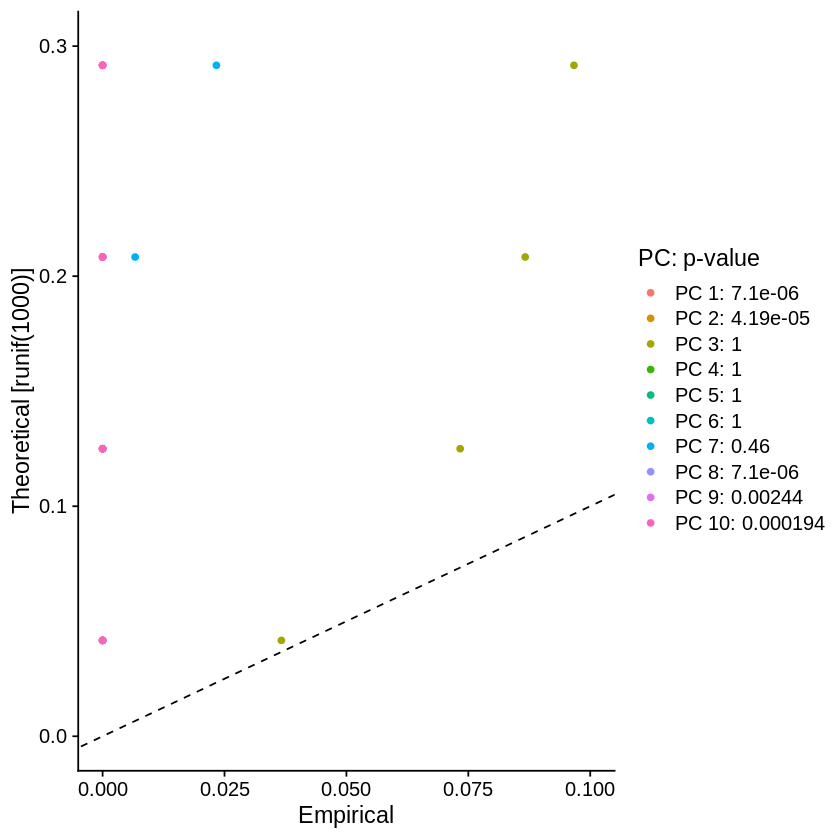

In [768]:
Hiplex.integrated<- RunPCA(object = Hiplex.integrated, features = VariableFeatures(object =Hiplex.integrated), verbose = FALSE)
Hiplex.integrated <- JackStraw(object =Hiplex.integrated, num.replicate = 100)
Hiplex.integrated<- ScoreJackStraw(object =Hiplex.integrated, dims = 1:10)
JackStrawPlot(object = Hiplex.integrated, dims = 1:10)
Hiplex.integrated<- FindNeighbors(object =Hiplex.integrated, dims = 1:10)
Hiplex.integrated<- FindClusters(object =Hiplex.integrated, resolution = 0.07)
Hiplex.integrated<- RunUMAP(object = Hiplex.integrated, reduction = "pca", dims = 1:10, spread = 3)

In [769]:
Hiplex.integrated@meta.data$Fos<-c(Hiplex_c1_Fos,Hiplex_c2_Fos,Hiplex_s1_Fos,Hiplex_s2_Fos)
Hiplex.integrated@meta.data$X<-c(Hiplex_c1_x,Hiplex_c2_x,Hiplex_s1_x,Hiplex_s2_x)
Hiplex.integrated@meta.data$Y<-c(Hiplex_c1_y,Hiplex_c2_y,Hiplex_s1_y,Hiplex_s2_y)
Hiplex.integrated@meta.data$Z<-c(Hiplex_c1_z,Hiplex_c2_z,Hiplex_s1_z,Hiplex_s2_z)

In [770]:
temp<-as.matrix(Hiplex.integrated@assays$RNA@counts)
colnames(temp)<-c()
rownames(temp)<-c()
depth<-colSums(temp)

In [771]:
Hiplex.integrated@meta.data$depth<-depth

In [776]:
saveRDS(Hiplex.integrated, file = "/media/garret/New Volume/scRNAseq_data/Yoshiko/Hiplex/3D/0.07/Wothreshold/0.25_hiplex_allcells_3D.rds")

In [4]:
Hiplex.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Yoshiko/Hiplex/3D/0.07/Wothreshold/0.25_hiplex_allcells_3D.rds")

In [5]:
colnames(Hiplex.integrated@assays$RNA@counts)<-c()

In [85]:
saveRDS(Hiplex.integrated@assays$RNA@counts,file="/media/garret/New Volume/scRNAseq_data/Yoshiko/Hiplex/3D/0.07/Wothreshold/Hiplex_expression_matrix_MHb.rds")

In [86]:
dim(Hiplex.integrated@assays$RNA@counts)

[1]    12 22432

In [6]:
new.ident <- c("hMHb1","hMHb2","hMHb3","hMHb4","hMHb5","hMHb6")
names(x = new.ident) <- levels(x =Hiplex.integrated)
Hiplex.integrated<- RenameIdents(object =Hiplex.integrated, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(Hiplex.integrated@assays$RNA@data[,which(Idents(object=Hiplex.integrated) %in% new.ident[i])]))}

In [7]:
cluster<-numeric()
for(i in 1:dim(Hiplex.integrated@meta.data)[1]){
    cluster[i]<-new.ident[as.numeric(Hiplex.integrated@meta.data$seurat_clusters[i])]
}
cluster<-factor(cluster,levels=c("hMHb1","hMHb2","hMHb3","hMHb4","hMHb5","hMHb6"))
Hiplex.integrated@meta.data$cluster<-cluster

# 2D

In [68]:
cells<-c(hMHb1_barcode,hMHb2_barcode,hMHb3_barcode,hMHb4_barcode,hMHb5_barcode,hMHb6_barcode)

In [69]:
Hiplex.integrated<-subset(Hiplex.integrated,cells=cells)

In [70]:
Anterior<-subset(Hiplex.integrated@meta.data,Z> -1.4)
Middle<-subset(Hiplex.integrated@meta.data,Z> -1.8 & Z< -1.5)
Posterior<-subset(Hiplex.integrated@meta.data,Z< -1.8)

In [71]:
color<-c("#800000","#000000","#42d4f4","#ffe119","#4363d8","#000075")

In [72]:

Anterior$Y<--Anterior$Y


Middle$Y<--Middle$Y


Posterior$Y<--Posterior$Y

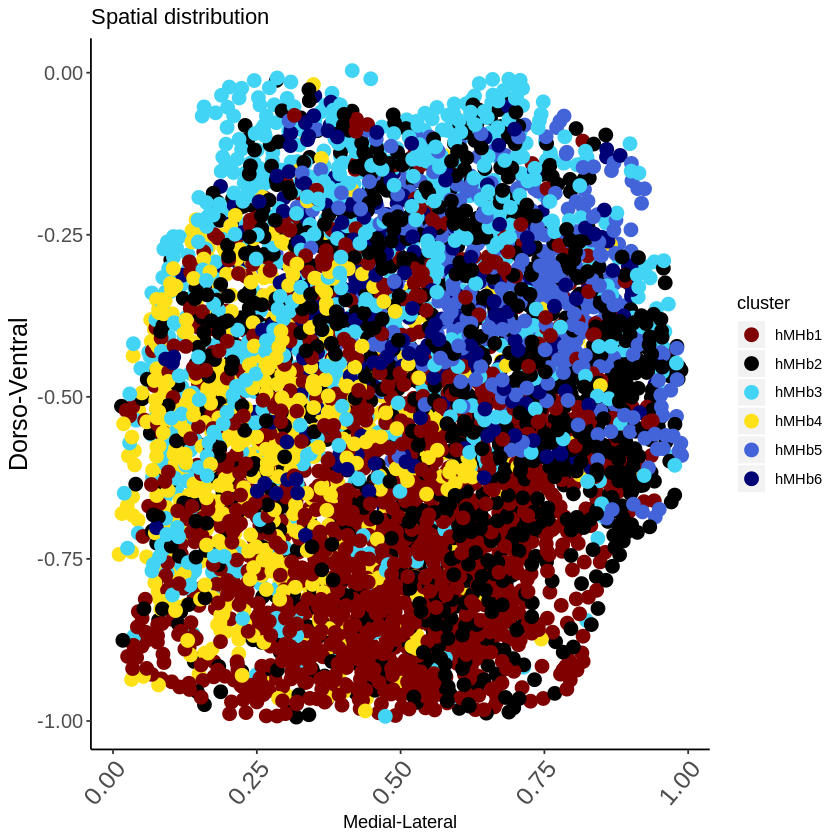

In [77]:
ggplot(Anterior,aes(x=X,y=Y,color=cluster))+geom_point(size=3.5)+ylab("Dorso-Ventral")+xlab("Medial-Lateral")+theme(axis.text.x=element_text(size=10,angle = 50, hjust = 1))+ggtitle("Anterior_MHb (%)")+scale_color_manual(values=color)+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("Spatial distribution")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/Hiplex/3D/0.07/Wothreshold/anterior2D_MHb_Fig5_3.5.pdf",width=10,height=10) # may use +scale_fill_manual(values=c("grey", "black"))

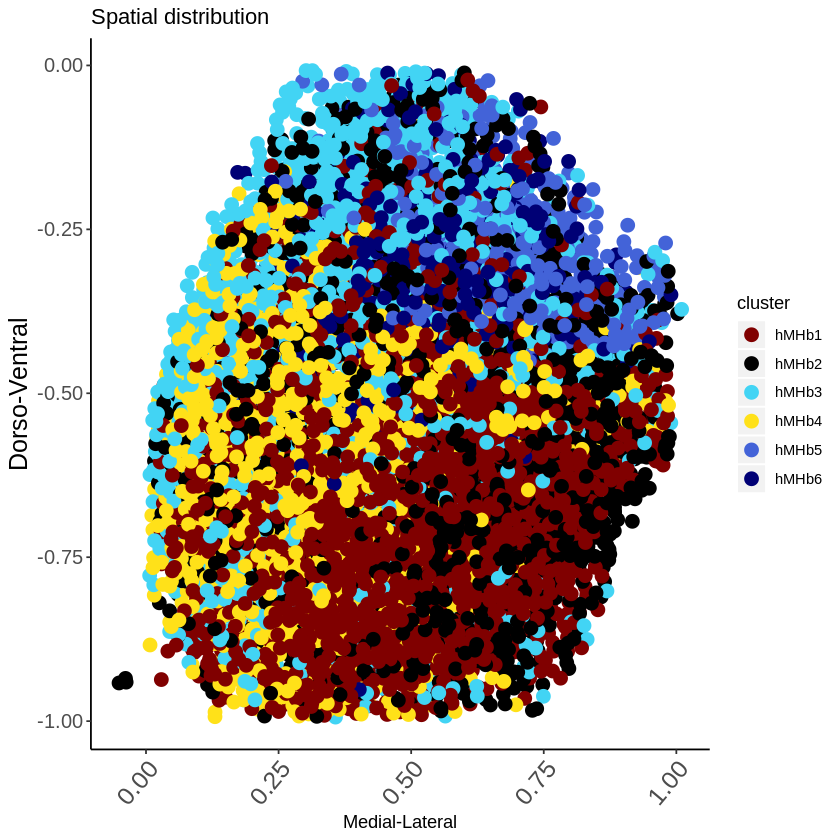

In [78]:
ggplot(Middle,aes(x=X,y=Y,color=cluster))+geom_point(size=3.5)      + ylab("Dorso-Ventral")+xlab("Medial-Lateral")+theme(axis.text.x=element_text(size=10,angle = 50, hjust = 1))+ggtitle("Fos_raw (%)")+scale_color_manual(values=color)+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("Spatial distribution")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/Hiplex/3D/0.07/Wothreshold/Middle2D_MHb_Fig5_3.5.pdf",width=10,height=10)

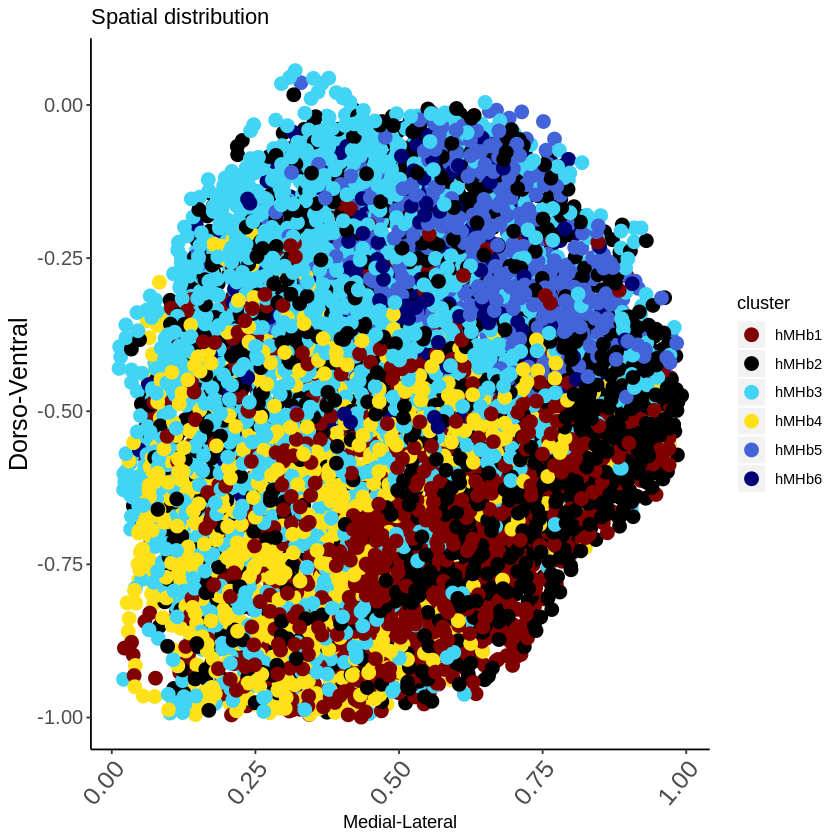

In [79]:
ggplot(Posterior,aes(x=X,y=Y,color=cluster))+geom_point(size=3.5)+ylab("Dorso-Ventral")+xlab("Medial-Lateral")+theme(axis.text.x=element_text(size=10,angle = 50, hjust = 1))+ggtitle("Fos_raw (%)")+scale_color_manual(values=color)+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("Spatial distribution")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/Hiplex/3D/0.07/Wothreshold/posterior2D_FIg5_3.5.pdf",width=10,height=10)

# integrating Hiplex and scRNAseq


In [788]:
LHb.integrated<-readRDS(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/LHb_integrated_0.8.rds")
new.ident <- c("MHb1","MHb2","MHb3","LHb1","LHb2","LHb3","MHb4","LHb4","MHb5","LHb5","LHb6","MHb6","Surr1","Surr2","Surr3","Surr4")
names(x = new.ident) <- levels(x =LHb.integrated)
LHb.integrated<- RenameIdents(object =LHb.integrated, new.ident)

In [789]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(LHb.integrated@assays$RNA@data[,which(Idents(object=LHb.integrated) %in% new.ident[i])]))}
MHb.integrated<-subset(x=LHb.integrated,cells=c(MHb1_barcode,MHb2_barcode,MHb3_barcode,MHb4_barcode,MHb5_barcode,MHb6_barcode))

In [801]:
mouse<-c("MHb3","MHb6","MHb4","MHb5","MHb1","MHb2")
Hiplex<-rev(c("hMHb3","hMHb4","hMHb6","hMHb5","hMHb2","hMHb1"))

In [802]:
corr<- data.frame(matrix(NA, ncol=length(mouse),nrow=length(Hiplex)))
rownames(corr)<-factor(Hiplex,levels=Hiplex)
colnames(corr)<-factor(mouse,levels=mouse)

In [803]:
p_value<- data.frame(matrix(NA, ncol=length(mouse),nrow=length(Hiplex)))
rownames(p_value)<-factor(Hiplex,levels=Hiplex)
colnames(p_value)<-factor(mouse,levels=mouse)

In [804]:
genes<-intersect(rownames(Hiplex.integrated@assays$RNA@data),rownames(MHb.integrated@assays$integrated@data))
mouse_exp<-MHb.integrated@assays$RNA@data[genes,]
MHb_H_exp<- Hiplex.integrated@assays$RNA@data[genes,]

In [805]:
mouse_exp<-t(scale(t(as.matrix(mouse_exp))))
MHb_H_exp<-t(scale(t(as.matrix(MHb_H_exp))))

In [806]:
for (i in 1:length(mouse)){
    for (j in 1:length(Hiplex)){
    corr[j,i]<-cor(rowMeans(as.matrix(mouse_exp[,eval(parse(text = paste(mouse[i],"_barcode",sep="")))])),rowMeans(as.matrix(MHb_H_exp[,eval(parse(text = paste(Hiplex[j],"_barcode",sep="")))])))
}}

In [808]:
library("reshape2")

In [809]:
test.m <- melt(as.matrix(corr))

In [810]:
min(corr)
max(corr)

[1] -0.6493894

[1] 0.9544311

In [676]:
library(scales)

In [671]:
for(i in 1:dim(test.m)[1]){
    if (test.p$value[i]>0.05){
        test.m$value[i]<-0
    }else{
        test.m$value[i]<-test.m$value[i]
    }
}

In [853]:
test.m

Var1,Var2,value
hMHb1,MHb3,-0.05896907
hMHb2,MHb3,-0.37105093
hMHb5,MHb3,-0.58255177
hMHb6,MHb3,-0.39192364
hMHb4,MHb3,0.72387379
hMHb3,MHb3,0.45387953
hMHb1,MHb6,0.14777809
hMHb2,MHb6,-0.13491473
hMHb5,MHb6,-0.43871466
hMHb6,MHb6,-0.44473105


Var1,Var2,value
hMHb1,MHb3,8.555515e-01
hMHb2,MHb3,2.350470e-01
hMHb5,MHb3,4.684898e-02
hMHb6,MHb3,2.076651e-01
hMHb4,MHb3,7.775661e-03
hMHb3,MHb3,1.383082e-01
hMHb1,MHb6,6.467107e-01
hMHb2,MHb6,6.759102e-01
hMHb5,MHb6,1.536578e-01
hMHb6,MHb6,1.474439e-01


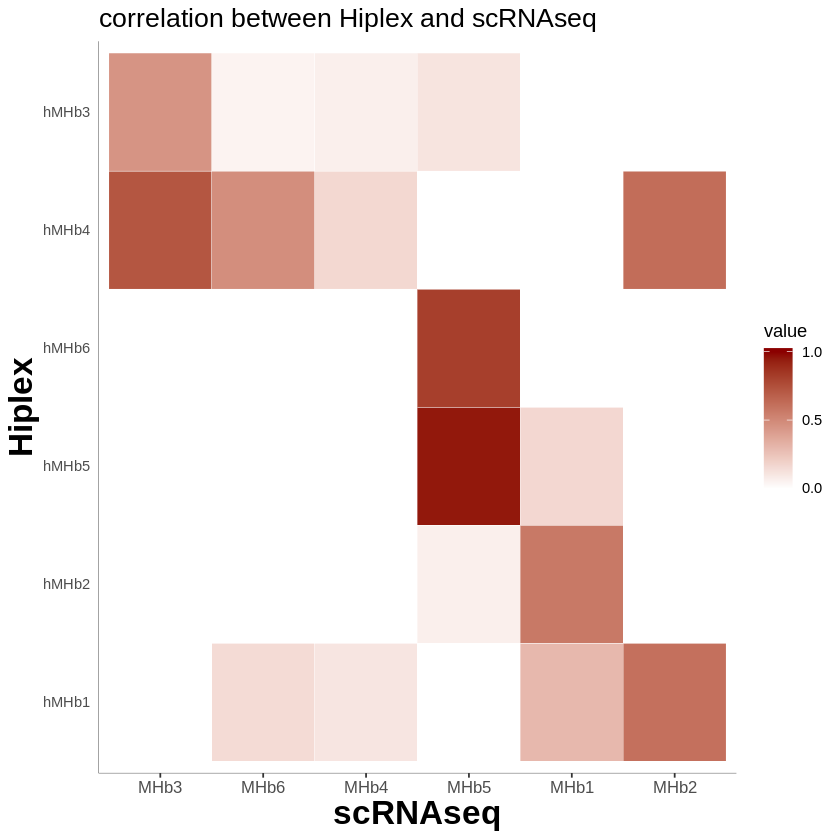

In [851]:
p <- ggplot(test.m, aes(Var2, Var1)) + geom_tile(aes(fill =value),
     colour = "white")+ scale_fill_continuous(limits=c(0.0,1), breaks=seq(0.0,1,by=0.5),low = "white",high = "darkred", oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+ylab("Hiplex")+xlab("scRNAseq")+theme(axis.text.x=element_text(size=10),axis.title=element_text(size=20,face="bold"),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black", size = 0.1),axis.ticks.y = element_blank())+ggtitle("correlation between Hiplex and scRNAseq")
print(pp)

# Disc plot

In [868]:
Cell_type<-factor(c("hMHb3","hMHb4","hMHb6","hMHb5","hMHb2","hMHb1"),levels=c("hMHb3","hMHb4","hMHb6","hMHb5","hMHb2","hMHb1"))
gene_list<-rev(c("Tac2","Neurod2","Zmat4","Synpr","Fn3krp","Kcng4","Cck","Ctxn1","Slc18a3","Col25a1","Spon1","Gpr151"))

In [869]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
Cell_number_t$pct[p]<-100*sum(Hiplex.integrated$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_t$avg[p]<-(mean(Hiplex.integrated$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(Hiplex.integrated$RNA@data[gene_list[i],]))/sd(Hiplex.integrated$RNA@data[gene_list[i],])
#for avg only consider the expressed cell
 #t<-LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0
# Cell_number_t$avg[p]<-mean(LHb.integrated@assays$RNA@data[gene_list[i],t])/sd(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])    
    }
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)
#actor(Cell_number$gene,levels=gene_list)

[1] hMHb3 hMHb4 hMHb6 hMHb5 hMHb2 hMHb1 hMHb3 hMHb4 hMHb6 hMHb5 hMHb2 hMHb1
[13] hMHb3 hMHb4 hMHb6 hMHb5 hMHb2 hMHb1 hMHb3 hMHb4 hMHb6 hMHb5 hMHb2 hMHb1
[25] hMHb3 hMHb4 hMHb6 hMHb5 hMHb2 hMHb1 hMHb3 hMHb4 hMHb6 hMHb5 hMHb2 hMHb1
[37] hMHb3 hMHb4 hMHb6 hMHb5 hMHb2 hMHb1 hMHb3 hMHb4 hMHb6 hMHb5 hMHb2 hMHb1
[49] hMHb3 hMHb4 hMHb6 hMHb5 hMHb2 hMHb1 hMHb3 hMHb4 hMHb6 hMHb5 hMHb2 hMHb1
[61] hMHb3 hMHb4 hMHb6 hMHb5 hMHb2 hMHb1 hMHb3 hMHb4 hMHb6 hMHb5 hMHb2 hMHb1
Levels: hMHb3 hMHb4 hMHb6 hMHb5 hMHb2 hMHb1

In [870]:
library(scales)

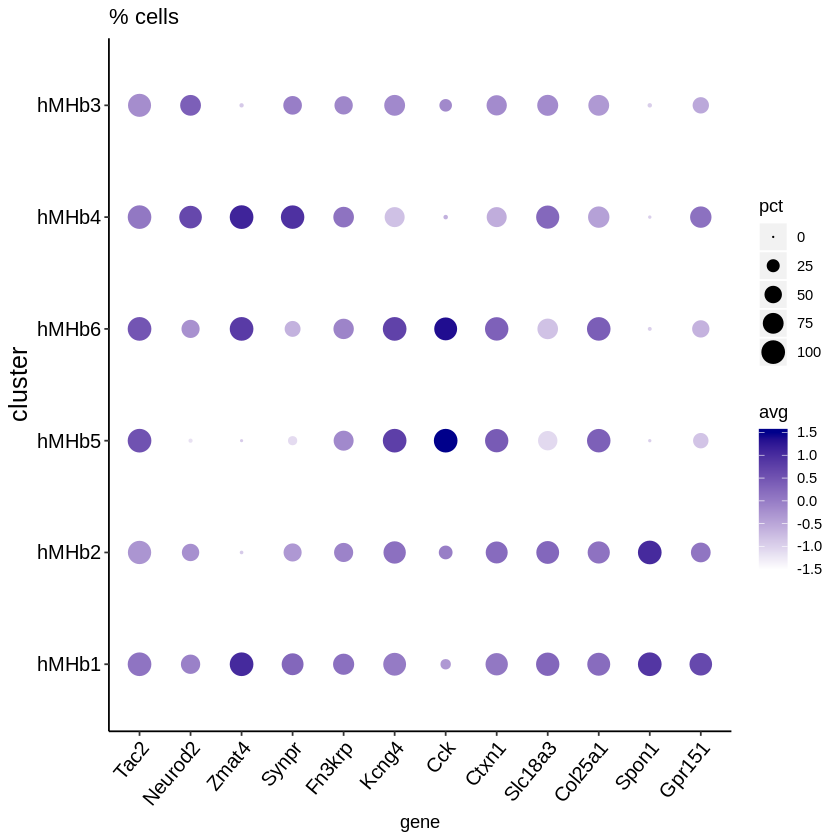

In [874]:
ggplot(Cell_number, aes(gene, cluster)) + geom_point(aes(size = pct, colour=avg)) + 
scale_x_discrete(limits = levels(Cell_number$gene))+scale_y_discrete(limits =rev(levels(Cell_number$cluster)))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-1.5,1.5),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ scale_size_continuous(range = c(0,6),limits=c(0,100),breaks=seq(0,100,25))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12,colour = "black"),axis.text.x=element_text(size=12,angle = 50, hjust = 1,colour = "black"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/Hiplex/3D/0.07/Wothreshold/discplots_Hiplex.pdf",height=2.8, width=9 , paper = "letter")